In [ ]:
import torch,torch.nn as nn, torch.nn.functional as F
import matplotlib.pyplot as plt, pandas as pd, numpy as np

In [ ]:
dp = pd.read_csv("/content/MBA_ADMISSIONS.csv")

print(dp.shape)

dp.sample(7)

(473, 14)


,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization
375,88.333333,23,84.0,74.0,66.00,63.26,90.000000,Male,South Zone,Engineering,Single,Rural,desired skills,Marketing
220,51.666667,22,91.2,94.4,73.15,70.67,71.666667,Female,South Zone,Engineering,Single,Semi Urban,prefered skills,LOS
193,91.666667,23,86.0,85.0,85.00,69.40,100.000000,Male,South Zone,Engineering,Single,Semi Urban,desired skills,HR
295,93.333333,22,92.0,94.0,78.71,66.29,73.333333,Female,South Zone,Engineering,Single,Urban,desired skills,LOS
216,90.000000,25,79.4,64.0,71.20,66.80,85.000000,Male,South Zone,Engineering,Single,Urban,desired skills,LOS
27,71.666667,24,79.8,61.6,60.33,69.28,76.666667,Female,Central Zone,Engineering,Single,Urban,prefered skills,Finance
311,40.000000,21,93.3,91.5,72.50,65.00,75.000000,Male,South Zone,Engineering,Single,Urban,prefered skills,LOS


#Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

def value_counts_categorical(df):
  value_counts_dict = {}
  for column in df.select_dtypes(include=["object"]):
    value_counts_dict[column] = df[column].value_counts()
    df[column] = label_enc.fit_transform(df[column])
  return value_counts_dict

categorical_value_counts = value_counts_categorical(dp)

for column, counts in categorical_value_counts.items():
  print(f"Value counts for column '{column}':")
  print(counts)
  print("-------------------------------------------------")


Value counts for column 'Gender':
Male      268
Female    205
Name: Gender, dtype: int64
-------------------------------------------------
Value counts for column 'STATE':
South Zone      258
North Zone       86
Central Zone     56
East Zone        52
West Zone        16
North East        5
Name: STATE, dtype: int64
-------------------------------------------------
Value counts for column 'Previous_Degree':
Engineering    235
Commerce       148
Management      44
Science         43
Arts             3
Name: Previous_Degree, dtype: int64
-------------------------------------------------
Value counts for column 'Marital_status':
Single     462
Married     11
Name: Marital_status, dtype: int64
-------------------------------------------------
Value counts for column 'Place_you_belong_to':
Urban         313
Semi Urban    116
Rural          44
Name: Place_you_belong_to, dtype: int64
-------------------------------------------------
Value counts for column 'perceived#Job#Skill':
prefered skil

In [ ]:
import seaborn as sns

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


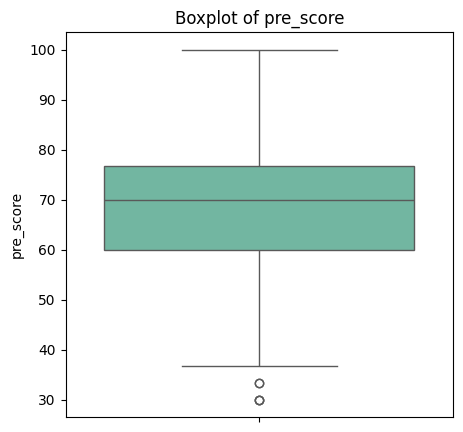

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


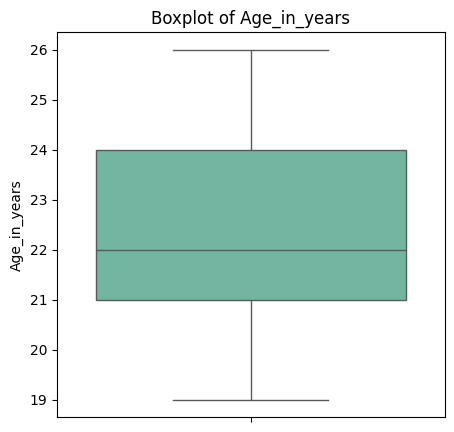

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


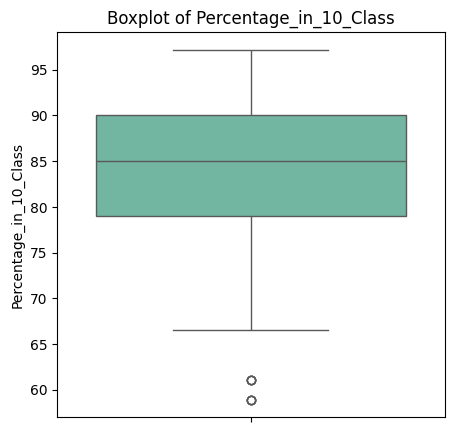

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


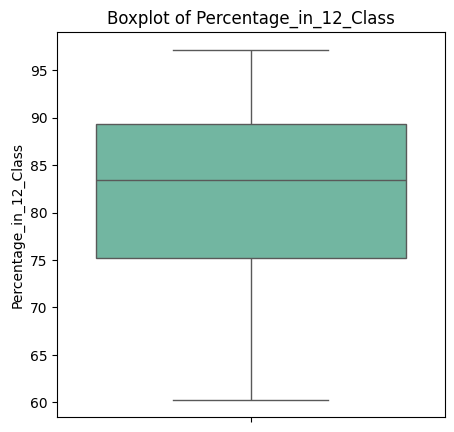

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


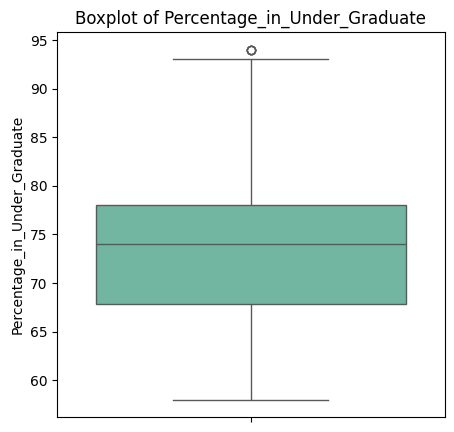

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


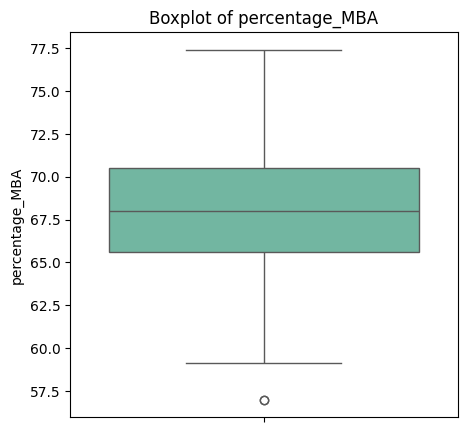

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


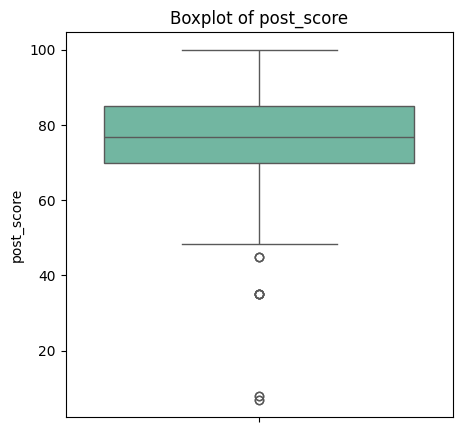

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


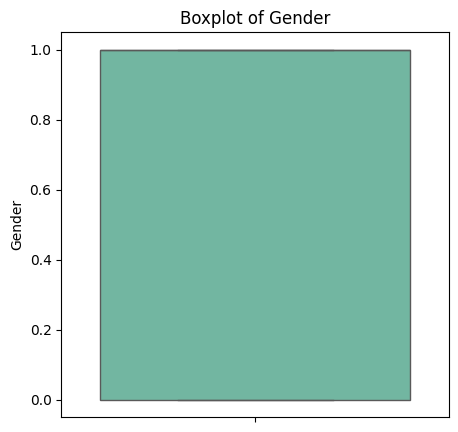

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


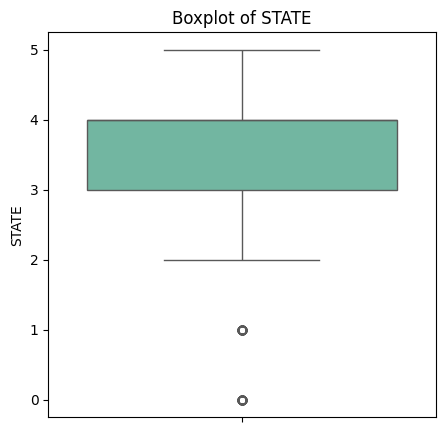

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


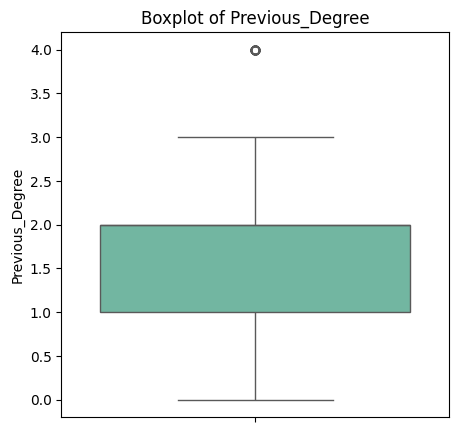

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


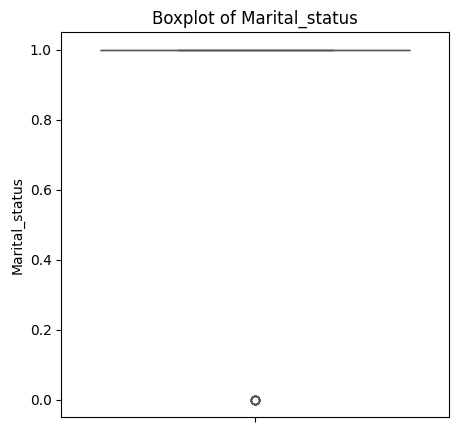

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


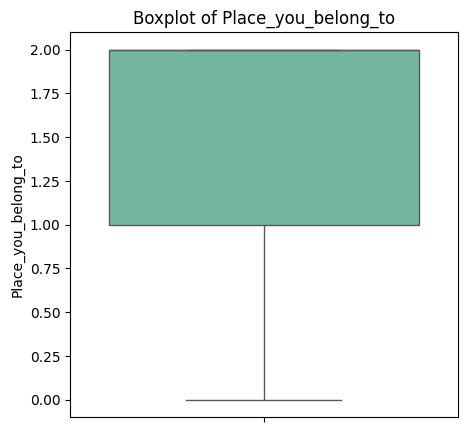

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


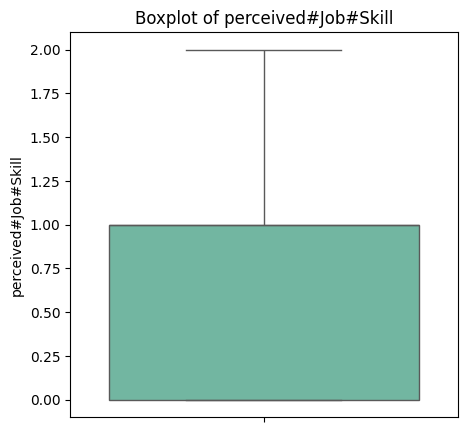

<ipython-input-5-fbad7f642821>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dp[column], palette="Set2")


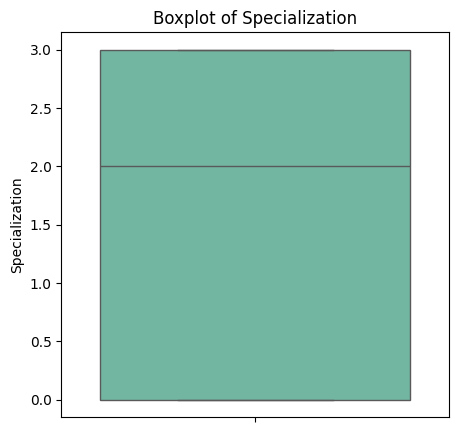

In [ ]:
# prompt: plot boxplot only for datatypes int and flaot

import matplotlib.pyplot as plt
numerical_columns = dp.select_dtypes(include=["int", "float"])
for column in numerical_columns:
  plt.figure(figsize=(5, 5))
  sns.boxplot(y=dp[column], palette="Set2")
  plt.title(f"Boxplot of {column}")
  plt.show()


In [ ]:
print("These points are removed")
print(dp[dp['post_score']<=20]['post_score'])

dp = dp[dp['post_score'] > 20]

These points are removed
33     7.0
54     7.0
250    8.0
337    8.0
Name: post_score, dtype: float64


#Pytorch Model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dp.drop('Specialization', axis=1), dp['Specialization'], test_size=0.2, random_state=42)


In [ ]:
class neural_classification(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(13,30)
    self.l2 = nn.Linear(30,15)
    self.h1 = nn.ReLU()
    self.l3 = nn.Linear(15,4)
    self.h2 = nn.ReLU()
    # self.l4 = nn.Linear(4,1)
    self.o = nn.Softmax()
  def forward(self,x):
    x = self.l1(x)
    x = self.h1(self.l2(x))
    x = self.h2(self.l3(x))
    x = self.o(x)

    return x

model_1 = neural_classification().to(device)

model_1

neural_classification(
  (l1): Linear(in_features=13, out_features=30, bias=True)
  (l2): Linear(in_features=30, out_features=15, bias=True)
  (h1): ReLU()
  (l3): Linear(in_features=15, out_features=4, bias=True)
  (h2): ReLU()
  (o): Softmax(dim=None)
)

In [ ]:
#accuracy

def accuracy(y1,y2):
  t = torch.eq(y1,y2).sum().item()
  return (t/len(y1))*100

In [ ]:
#Criterion and optimizer.

loss_fxn = nn.BCELoss()

optim1 = torch.optim.Adam(model_1.parameters(),lr=0.01)

In [ ]:
#x_train,x_test,y_train,y_test are a dataframe. convert it ot tensors

x_train = torch.FloatTensor(x_train.values).to(device)
x_test = torch.FloatTensor(x_test.values).to("cuda")
y_train = torch.FloatTensor(y_train.values).to("cuda")
y_test = torch.LongTensor(y_test.values).to("cuda")


In [ ]:
epochs = 100

x_train,x_test,y_train,y_test = x_train.to("cuda"),x_test.to("cuda"),y_train.to("cuda"),y_test.to("cuda")

for i in range(epochs):
  #train
  model_1.train()

  #forward
  with torch.no_grad():
    y_pred = model_1(x_train).squeeze()
    y_sigmoid = torch.sigmoid(y_pred)

    ##find accuracy
    _, indices = torch.max(y_sigmoid, dim=1)
    accss = accuracy(y_train,indices)

  #loss
  indices = indices.float()
  loss = loss_fxn(indices,y_train)

  #optim, backward
  optim1.zero_grad()
  loss.backward()
  optim1.step()

  #testing
  model_1.eval()
  with torch.no_grad():
    #forward
    y_pred_1 = model_1(x_test).squeeze()
    y_sig_1 = torch.sigmoid(y_pred_1)

    #loss
    loss = loss_fxn(y_pred_1,y_test)

    #acc
    _,ind = torch.max(y_sig_1,dim=1)
    acc2 = accuracy(y_test,ind)


  if(i%10==0):
    f"{1}.)training data: Acc={accss}% and Testing data: Acc={acc2}"

In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100


# Put data to target device
X_train, y_train = x_train.to(device), y_train.to(device)
X_test, y_test = x_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_1.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_1(x_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")